> 公众号《凹凸玩数据》

数据的分布形态描述是最形象的描述方式,因为可以用各种统计图形将数据的分布形态展现在图形中,让人一目了然.通常我们研究概率分布主要是研究各种分布的公式,均值,方差,分布以及常用实例.

## 离散变量概率分布

离散型概率分布是一条条垂直于X轴的垂线(或矩形柱),每条垂线与X轴的交点代表事件可能发生的结果,垂线上端点对应的Y轴表示该结果发生的概率.常见的离散型概率分布有伯努利分布,二项分布和泊松分布等.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson

### 二项分布

二项分布（Binomial distribution）是n个独立的是/非试验中成功的次数的离散概率分布，其中每次试验的成功概率为p。实际上单次的成功/失败试验就是一次伯努利试验;当n=1时,二项分布就是伯努利分布.

二项分布的**公式**表达为:


$$
f(k;n,p)=Pr(X=k)=\left(_k^n\right)p^k(1-p)^{n-k}
$$

对于k=0, 1, 2,...,n,其中$\left(_k^n\right)=\frac{n!}{k!(n-k)!}$是二项式系数（这就是二项分布的名称的由来），又记为C(n,k)。该公式可以用以下方法理解：我们希望有$k$次成功$(p^k)$和$n−k$次失败$(1−p)^{n−k}$。然而，k次成功可以在n次试验的任何地方出现，而把k次成功分布在n次试验中共有C(n, k)个不同的方法。

**期望值**为:

$$
E[X]=np
$$

**方差**为:

$$
Var[X]=np(1-p)
$$

Text(0, 0.5, 'probability')

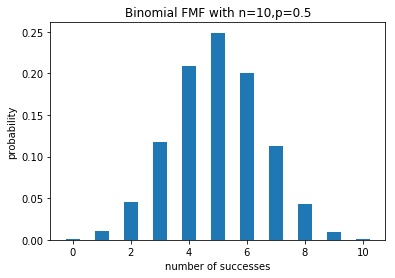

In [2]:
# 利用plt模拟二项分布
n , p =10 ,0.5
sample = np.random.binomial(n, p, size=10000)  # 产生10000个符合二项分布的随机数
bins = np.arange(n + 2)
plt.hist(sample, bins=bins, align='left',density=True, rwidth=0.5)  # 绘制直方图
# 设置标题和坐标
plt.title('Binomial FMF with n={},p={}'.format(n, p))
plt.xlabel('number of successes')
plt.ylabel('probability')

### 伯努利分布

现实生活中许多事件或活动的结果往往只有两个.抛硬币问题(正面/反面),产品质量检验问题(合格/不合格),投票选举问题(支持/不支持)等.如果某事件或活动的结果多于两个,但只关心其中一个,也可视为只有两个结果,比如奥运会中国乒乓球队是否获得金牌(排名有很多,奖牌也分为金银铜三种,但这里我们只关心是否拿金牌,也就是只有两个结果,获得金牌或未获得金牌).对于以上类似事件,在实际运用中,一般用"成功"表示我们感兴趣的发生结果(比如合格,支持,获得金牌等),用"失败"表示我们不感兴趣的结果.这一类事件或活动被称为伯努利试验.  

伯努利分布(Bernoulli distribution)，又名两点分布或者0-1分布，是一个离散型概率分布.若伯努利试验成功，则伯努利随机变量取值为1。若伯努利试验失败，则伯努利随机变量取值为0。记其成功概率为$p(0≤p≤1)$,失败概率为$q=1-p$,则伯努利分布的**公式**表达为:

$$
f_X(x)=p^x(1-p)^{1-x}=\begin{cases}
p, \quad if& x=1\\
q, \quad  if& x=0
\end{cases}
$$

**期望值**为:
$$
E[X]=\sum_{i=0}{1}x_if_X(x)=0+p=p
$$

**方差**为:

$$
var[X]=\sum_{i=0}{1}=(x_i-E[X])^2f_X(x)=(0-p)^2(1-p))+(1-p)^2p=p(1-p)=pq
$$

Text(0.5, 1.0, '伯努利分布：p=0.50')

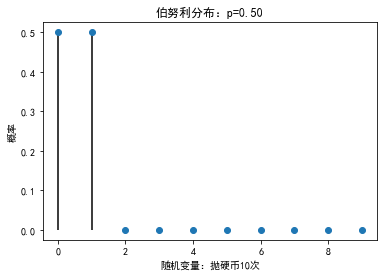

In [3]:
# 利用plt模拟伯努利分布
#解决画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
#定义随机变量
X = np.arange(10) 
p = 0.5
#伯努利概率函数
pList = bernoulli.pmf(X,p)
#绘图，marker：点的形状，linestyle：线条的形状
plt.plot(X,pList,marker = 'o',linestyle = 'None' )
#vlines绘制树直线，参数的含义（x轴坐标轴，y轴最小值，y轴最大值）
plt.vlines(X,0,pList)
plt.xlabel("随机变量：抛硬币{}次".format(len(X)))
plt.ylabel("概率")
plt.title('伯努利分布：p={:.2f}' .format(p))

### 泊松分布

泊松分布考虑的是在连续时间或空间单位上发生的随机事件次数的概率.换句话说,基于过去某个随机事件在某段时间或某个空间内发生的平均次数,如某一服务设施在一定时间内受到的服务请求的次数，电话交换机接到呼叫的次数、汽车站台的候客人数、机器出现的故障数、自然灾害发生的次数、DNA序列的变异数、放射性原子核的衰变数、激光的光子数分布等等。

泊松分布的**公式**表达为:

$$
P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}
$$
参数λ是单位时间（或单位面积）内随机事件的平均发生率.

**期望值**为:
$$
E(X)=\lambda
$$

**方差**为:
$$
Var(X)=E(X)=\lambda
$$

假设通过一定时间的观察，我们知道某个路口每小时平均有8辆车通过，这是一个典型的泊松分布实例，我们通过Python进行统计模拟来看看在统计图它具体是如何呈现的。

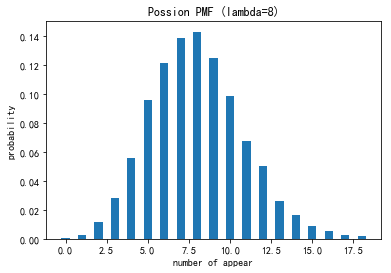

In [4]:
# 用plt模拟泊松分布
lamb = 8
sample = np.random.poisson(lamb, size=10000)
bins = np.arange(20)
plt.hist(sample, bins=bins, align='left',density=True, rwidth=0.5)
plt.title('Possion PMF (lambda=8)')
plt.xlabel('number of appear')
plt.ylabel('probability')
plt.show()